#### Import Libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Live.csv')
df.head()

,Unnamed: 0,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,hour,day_of_week,total_reactions,engagement
0,0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018,4,22,6,6,529,1303
1,1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018,4,21,22,5,150,150
2,2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018,4,21,6,5,227,520
3,3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018,4,21,2,5,111,111
4,4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018,4,18,3,2,213,213


In [4]:
df.isnull().sum()

Unnamed: 0          0
status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
year                0
month               0
day                 0
hour                0
day_of_week         0
total_reactions     0
engagement          0
dtype: int64

<Axes: >

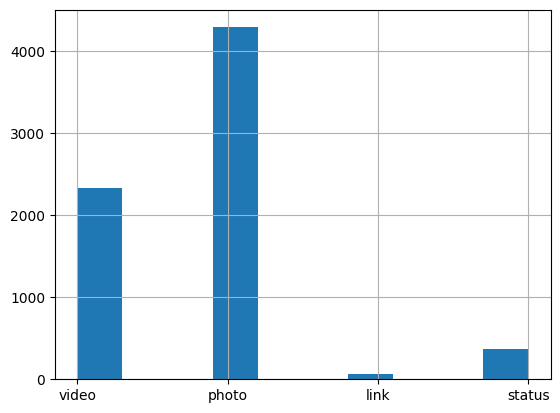

In [6]:
df['status_type'].hist()

In [8]:
df.columns

Index(['Unnamed: 0', 'status_id', 'status_type', 'status_published',
       'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'year', 'month',
       'day', 'hour', 'day_of_week', 'total_reactions', 'engagement'],
      dtype='object')

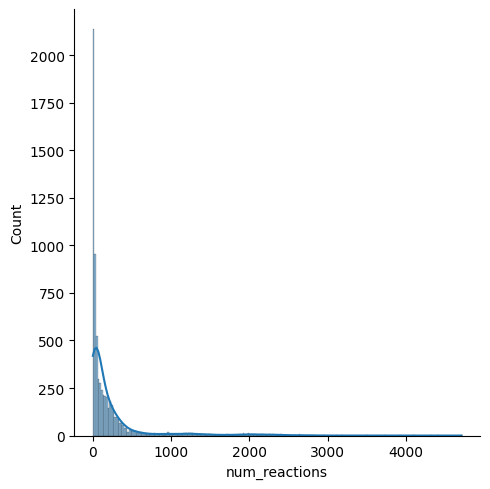

In [10]:
sns.displot(x='num_reactions', data=df, kde=True)

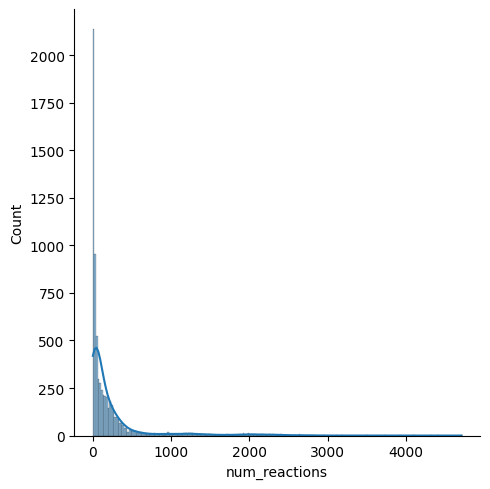

In [11]:
sns.displot(x='num_reactions', data=df, kde=True)

In [12]:
x = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes']].iloc[:,].values
x

array([[529, 512, 262, 432],
       [150,   0,   0, 150],
       [227, 236,  57, 204],
       ...,
       [  2,   0,   0,   1],
       [351,  12,  22, 349],
       [ 17,   0,   0,  17]], shape=(7050, 4))

Text(0, 0.5, 'Ylabel')

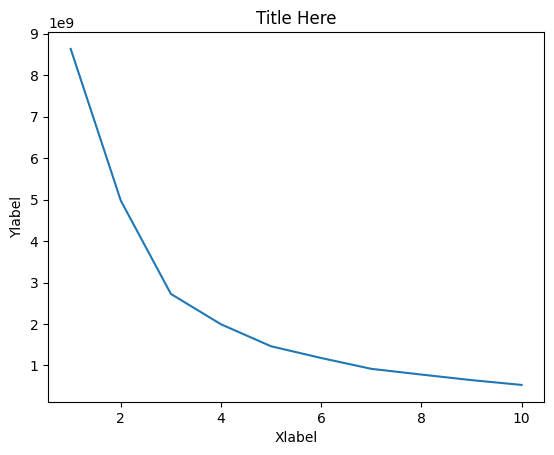

In [16]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Title Here')
plt.xlabel('Xlabel')
plt.ylabel('Ylabel')

In [17]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], shape=(7050,), dtype=int32)

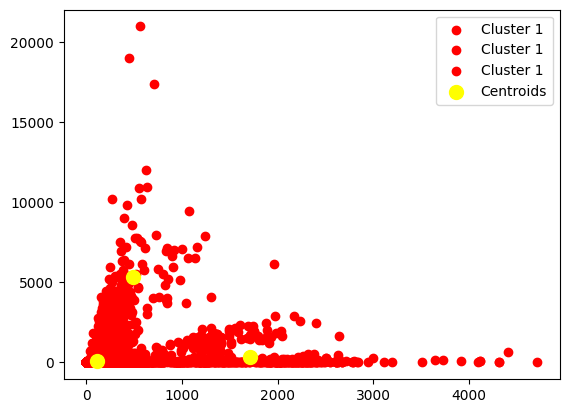

In [18]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c='red', label='Cluster 1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='yellow', s=100, label='Centroids')
plt.legend()
